# Data acquisition for spatiotemporal analysis: major considerations

## Contents
- Spatial turn, with a time flow
- Preliminaries: classification of spatiotemporal processes
- What should we collect and how would they be collected?
- Areal data: in the U.S.
- Illustration: census tracts


## Who am I?
__Insang Song__
- Ph.D. Candidate in Geography, University of Oregon
- Research interests: Spatiotemporal analysis, Causal inference, Mental health, Spatial data science
- Uses R daily and Python weekly

## Spatial turn with a time shift
- Spatial turn: widespread interests in spatial dimensions of phenomena which are subject to academic fields
> "Notions of place and space, much debated by geographers, have been as central a concern for intellectual historians and historians of science as for philosophers and others, but they have been differently expressed." -- Withers (2009:638)
- Temporal dimension also matters
    - Daily mobility patterns
    - Individual experience and environmental exposure
    - Dynamics in natural phenomena

## Spatiotemporal analysis: a primer

## What type of data?
<center><font color='red'><b>Think what and how changes at a dimension(s) affect the outcome</b></font></center>    

- Vector geometries
    - Point: presence of special species, air pollution monitoring, river gauges
    - Line: human daily trajectories, wildlife trajectories
    - Polygon: Census geographies, ZIP codes, any local area units
- Raster images
    - Multi-temporal images: vegetation, water, air pollution, geomagnetic properties, ...
    - Panchromatic images/other satellite pictures: surveillance, short-term environmental changes (e.g., wildfire, flood, ...)

In [13]:
options(repr.plot.width = 4.8, repr.plot.height = 4, repr.plot.res = 300)
library(smerc)
library(ggplot2)



## Get into the data
### Ways of collection
- Directly download from providers' webpages (point-and-click)
- Using application programming interface (API) of providers (e.g., Census Bureau, NHGIS, etc.)

### Data from multiple time points
- It is important to look into the border changes and the changes in the details of measuring subjects
    - Code and description changes (e.g., race/ethnicity questions in decennial censuses)
    - Consolidation, annexation, and separation of areas (county, ZIP code areas, census tracts, ...)

## Problem definition and possible solutions
1. Spatial and temporal resolution mismatch
    - Matching resolutions by geostatistical or machine learning algorithms
    - Uncertainty should be assessed and reported

    
2. Changing geographies through time
    - Unifying boundaries that are maximally available through the all time
    - Using crosswalk files
    - Using sophisticated statistical measures such as areal interpolation

## Hands-on example
### Background
- Census tracts in Portland, OR
- 2000 and 2010 Census
    - 2010 Census tract boundary is also effective for ACS in 2010-2019
    - 2000 boundary is effective for ACS in 2005-2009

### Objective
- To consolidate the 5-year ACS data from 2009 (2005-2009) and 2010 (2006-2010)

## Crosswalk
- __Crosswalk__: table(s) of the relationship or matching records between geographic areas in different years
- General information on crosswalk with a focus in census data: [Link](https://www.nhgis.org/geographic-crosswalks)
- For data from the Census Bureau, crosswalk files are available for 2000, 2010, and 2020 censuses

### Crosswalk sources
- [HUD ZIP crosswalk](https://www.huduser.gov/portal/datasets/usps_crosswalk.html)
- [U.S. Census Bureau's Relationship files](https://www.census.gov/geographies/reference-files/time-series/geo/relationship-files.html)
- [2020 Census Block Crosswalk data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T9VMJO)


## American Community Survey

In [35]:
# crosswalk file directly from Census Bureau
cw_or = read.csv("https://www2.census.gov/geo/docs/maps-data/data/rel/trf_txt/or41trf.txt", header = FALSE)
colnames(cw_or) = c("STATE00", "COUNTY00", "TRACT00", "GEOID00", "POP00", "HU00", "PART00", "AREA00", "AREALAND00",
                    "STATE10", "COUNTY10", "TRACT10", "GEOID10", "POP10", "HU10", "PART10", "AREA10", "AREALAND10",
                    "AREAPT", "AREALANDPT", "AREAPCT00PT", "AREALANDPCT00PT", "AREAPCT10PT", "AREALANDPCT10PT", 
                    "POP10PT", "POPPCT00", "POPPCT10", "HU10PT", "HUPCT00", "HUPCT10")
head(cw_or)

,STATE00,COUNTY00,TRACT00,GEOID00,POP00,HU00,PART00,AREA00,AREALAND00,STATE10,⋯,AREAPCT00PT,AREALANDPCT00PT,AREAPCT10PT,AREALANDPCT10PT,POP10PT,POPPCT00,POPPCT10,HU10PT,HUPCT00,HUPCT10
,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,16,75,980300,16075980300,7969,3061,P,193421610,190662899,41,⋯,0.65,0.54,0.73,0.61,0,0,0,0,0,0
2,41,1,950100,41001950100,2761,1936,P,2886826315,2872337282,41,⋯,100.00,100.00,100.00,100.00,2761,100,100,1936,100,100
3,41,1,950100,41001950100,2761,1936,P,2886826315,2872337282,41,⋯,0.00,0.00,0.00,0.00,0,0,0,0,0,0
4,41,1,950200,41001950200,3145,1524,W,20004678,20004678,41,⋯,100.00,100.00,100.00,100.00,3145,100,100,1524,100,100
5,41,1,950300,41001950300,2648,1353,W,1755855349,1750622770,41,⋯,100.00,100.00,100.00,100.00,2648,100,100,1353,100,100
6,41,1,950400,41001950400,3026,1468,W,5561747,5382767,41,⋯,100.00,100.00,100.00,100.00,3026,100,100,1468,100,100


In [3]:
# Multnomah County FIPS: 41051
# packages to retrieve ACS and TIGER/Line files
if (!require(tigris)) { install.packages('tigris') }
if (!require(tidycensus)) { install.packages('tidycensus') }
# For plots
if (!require(ggplot2)) { install.packages('ggplot2') }
if (!require(sf)) { install.packages('sf') }
# Data munging
if (!require(dplyr)) { install.packages('dplyr') }
if (!require(tidyr)) { install.packages('tidyr') }

# API key (can be obtained at http://api.census.gov/data/key_signup.html)
capi <- '05db0646f9956eba295b88d5a86bf4fe455459f3'
census_api_key(capi)

# Tract boundary
pdx_tract10 = tigris::tracts(state = 41, county = "051", year = 2010, refresh = T)
pdx_tract00 = tigris::tracts(state = 41, county = "051", year = 2000, refresh = T)
# Population data by age group
pop_codes = paste("B01001_", sprintf("%03d", 1:49), sep = "")
pdx_pop10 = tidycensus::get_acs(geography = "tract", variables = pop_codes, year = 2010, state = 41, county = "051") %>%
    dplyr::select(-NAME, -moe) %>%
    pivot_wider(values_from = estimate, names_from = variable)
pdx_pop09 = tidycensus::get_acs(geography = "tract", variables = pop_codes, year = 2009, state = 41, county = "051") %>%
    dplyr::select(-NAME, -moe) %>%
    pivot_wider(values_from = estimate, names_from = variable)


Loading required package: tidyr

To install your API key for use in future sessions, run this function with `install = TRUE`.

Getting data from the 2006-2010 5-year ACS

Getting data from the 2005-2009 5-year ACS



ERROR: Error in check_join(x, y): object 'pdx_pop00' not found


In [11]:
pdx_tract00

,STATEFP00,COUNTYFP00,TRACTCE00,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry,COUNTYFP,STATEFP
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<MULTIPOLYGON [°]>,<chr>,<chr>
234,41,051,003402,41051003402,34.02,Census Tract 34.02,G5020,S,773286,0,+45.5513945,-122.6686051,MULTIPOLYGON (((-122.6756 4...,051,41
235,41,051,003501,41051003501,35.01,Census Tract 35.01,G5020,S,1137696,0,+45.5594305,-122.6846893,MULTIPOLYGON (((-122.675 45...,051,41
236,41,051,003502,41051003502,35.02,Census Tract 35.02,G5020,S,1082630,0,+45.5517295,-122.6824993,MULTIPOLYGON (((-122.6908 4...,051,41
237,41,051,003601,41051003601,36.01,Census Tract 36.01,G5020,S,1633640,0,+45.5710705,-122.6559374,MULTIPOLYGON (((-122.6501 4...,051,41
238,41,051,003602,41051003602,36.02,Census Tract 36.02,G5020,S,2215811,0,+45.5693524,-122.6409206,MULTIPOLYGON (((-122.6306 4...,051,41
239,41,051,003603,41051003603,36.03,Census Tract 36.03,G5020,S,921308,0,+45.5678612,-122.6253670,MULTIPOLYGON (((-122.6187 4...,051,41
240,41,051,003701,41051003701,37.01,Census Tract 37.01,G5020,S,1476165,0,+45.5763280,-122.6682371,MULTIPOLYGON (((-122.6613 4...,051,41
241,41,051,003702,41051003702,37.02,Census Tract 37.02,G5020,S,849131,0,+45.5663280,-122.6681621,MULTIPOLYGON (((-122.6614 4...,051,41
242,41,051,003801,41051003801,38.01,Census Tract 38.01,G5020,S,1237419,0,+45.5811756,-122.6839854,MULTIPOLYGON (((-122.6743 4...,051,41


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


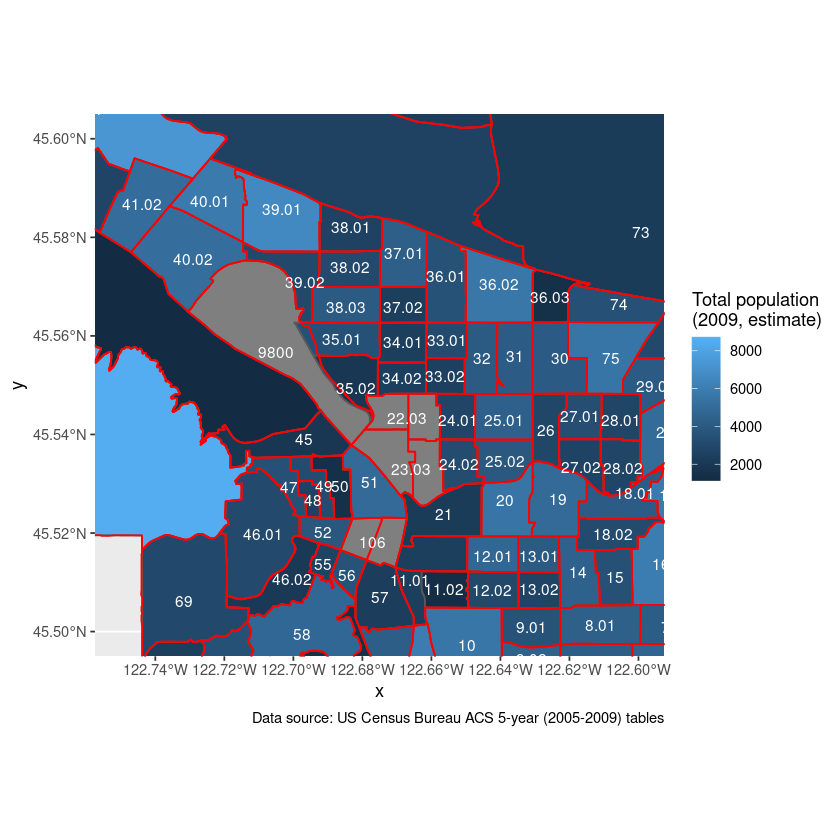

In [31]:
# Join
pdx_tract10p = pdx_tract10 %>%
    left_join(pdx_pop10, by = c("GEOID10" = "GEOID"))
pdx_tract00p = pdx_tract00 %>%
    left_join(pdx_pop09, by = c("CTIDFP00" = "GEOID"))

# If we don't use crosswalk...
pdx_tract1009p = pdx_tract10 %>%
    left_join(pdx_pop09, by = c("GEOID10" = "GEOID"))
ggplot() +
    geom_sf(data = pdx_tract1009p,
       mapping = aes(fill = B01001_001)) + 
    labs(fill = "Total population\n(2009, estimate)",
         caption = "Data source: US Census Bureau ACS 5-year (2005-2009) tables") + 
    geom_sf(data = pdx_tract00p, fill = 'transparent', color = 'red') +
    geom_sf_text(data = pdx_tract1009p, 
                 mapping = aes(label = NAME10),
                 cex = 3.25, color = 'white') +
    coord_sf(xlim = c(-122.75, -122.6), ylim = c(45.5, 45.6))

In [41]:
pdx_pop09_cw = 
  # input data is pdx_pop09, which is 2005-2009 population estimates
  pdx_pop09 %>%
  # we do full join because there may be duplicate tracts in the crosswalk table
  full_join(cw_or %>% mutate(GEOID00 = as.character(GEOID00)), 
            by = c('GEOID' = 'GEOID00')) %>%
  # just a data cleaning for the join in the next step
  mutate(GEOID10 = as.character(GEOID10)) %>%
  # group_by function is a grouping function for
  # (internally) aggregating records with the same
  # value of GEOID10 value.
  # Please note that we use GEOID10, NOT GEOID00!
  group_by(GEOID10) %>%
  # summarize_at function summarizes multiple columns
  # specified in .vars argument.
  summarize_at(.vars = vars(B01001_001:B01001_049),
               .funs = list(~floor(sum(. * ((POP00 * POPPCT00 / 100)/ sum(POP00 * POPPCT00 / 100)))))) %>%
  # We usually ungroup the grouped data frame because
  # the grouped one works in a unique way (i.e., grouping will be kept)
  ungroup

In [42]:
pdx_pop09_cw[grep("^41051", pdx_pop09_cw$GEOID10),] |> head()

GEOID10,B01001_001,B01001_002,B01001_003,B01001_004,B01001_005,B01001_006,B01001_007,B01001_008,B01001_009,⋯,B01001_040,B01001_041,B01001_042,B01001_043,B01001_044,B01001_045,B01001_046,B01001_047,B01001_048,B01001_049
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41051000100,5923,2851,167,298,89,90,16,0,19,⋯,182,273,74,160,48,34,105,66,0,84
41051000200,6071,2904,227,188,36,34,152,45,53,⋯,236,242,23,83,59,42,109,50,75,90
41051000301,4280,2142,94,25,88,0,170,89,67,⋯,170,73,22,12,64,11,24,123,23,119
41051000302,6625,3045,233,221,198,123,28,49,15,⋯,361,265,114,54,50,40,80,45,85,76
41051000401,3199,1512,88,26,51,19,8,0,10,⋯,95,52,31,25,10,20,88,25,17,46
41051000402,3108,1536,72,129,89,23,41,33,47,⋯,140,83,60,78,33,32,38,35,52,39


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


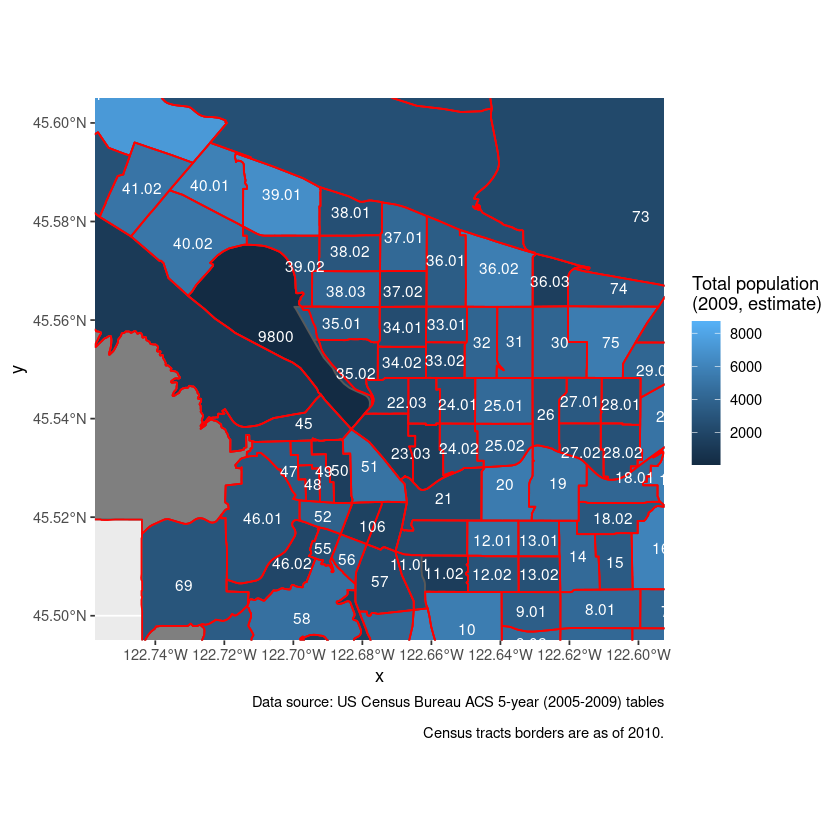

In [43]:
# After we use crosswalk...
pdx_tract1009pcw = pdx_tract10 %>%
    left_join(pdx_pop09_cw, by = c("GEOID10" = "GEOID10"))
ggplot() +
    geom_sf(data = pdx_tract1009pcw,
       mapping = aes(fill = B01001_001)) + 
    labs(fill = "Total population\n(2009, estimate)",
         caption = "Data source: US Census Bureau ACS 5-year (2005-2009) tables\n
                    Census tracts borders are as of 2010.") + 
    geom_sf(data = pdx_tract00p, fill = 'transparent', color = 'red') +
    geom_sf_text(data = pdx_tract1009p, 
                 mapping = aes(label = NAME10),
                 cex = 3.25, color = 'white') +
    coord_sf(xlim = c(-122.75, -122.6), ylim = c(45.5, 45.6))